In [8]:
import numpy as np
import pandas as pd
import itertools

# Import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

# Import statistical packages
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm #version >0.8 required

# Ignore warning
import warnings
warnings.filterwarnings('ignore')


In [10]:
df = pd.read_csv('e:/crime_analysis/crime_chicago.csv')

In [27]:
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-28 12:45:00,11243289,JB168554,2018-02-28 12:45:00,022XX E 70TH PL,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,5.0,43.0,18,1192215.0,1858649.0,2018,05/04/2018 03:51:04 PM,41.767115,-87.571005,"(41.767114711, -87.571005271)"
2018-02-28 12:48:00,11243323,JB168585,2018-02-28 12:48:00,014XX S HOMAN AVE,0460,BATTERY,SIMPLE,CHA PARKING LOT/GROUNDS,False,False,...,24.0,29.0,08B,1153932.0,1892909.0,2018,05/04/2018 03:51:04 PM,41.861974,-87.710418,"(41.861974172, -87.710418378)"
2018-02-28 12:50:00,11243193,JB168566,2018-02-28 12:50:00,052XX W CHICAGO AVE,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,SIDEWALK,True,False,...,37.0,25.0,18,1141122.0,1904825.0,2018,05/04/2018 03:51:04 PM,41.894919,-87.757149,"(41.894918618, -87.757148774)"
2018-02-28 12:50:00,11243196,JB168531,2018-02-28 12:50:00,035XX N ALBANY AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,33.0,21.0,04B,1155089.0,1923534.0,2018,05/04/2018 03:51:04 PM,41.945989,-87.705348,"(41.945988797, -87.705348212)"
2018-02-28 12:55:00,11242760,JB168079,2018-02-28 12:55:00,035XX N ELSTON AVE,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,False,False,...,35.0,21.0,06,1154298.0,1923613.0,2018,05/04/2018 03:51:04 PM,41.946221,-87.708254,"(41.946221444, -87.708253555)"


In [11]:
df['Date'] =  pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S %p')

In [12]:
df['Primary Type'].value_counts()

THEFT                                1390307
BATTERY                              1211552
CRIMINAL DAMAGE                       759934
NARCOTICS                             705480
OTHER OFFENSE                         411779
ASSAULT                               410102
BURGLARY                              382951
MOTOR VEHICLE THEFT                   310220
DECEPTIVE PRACTICE                    254312
ROBBERY                               251655
CRIMINAL TRESPASS                     190673
WEAPONS VIOLATION                      68330
PROSTITUTION                           68035
PUBLIC PEACE VIOLATION                 47236
OFFENSE INVOLVING CHILDREN             44381
CRIM SEXUAL ASSAULT                    26322
SEX OFFENSE                            24544
INTERFERENCE WITH PUBLIC OFFICER       14607
GAMBLING                               14299
LIQUOR LAW VIOLATION                   13942
ARSON                                  10984
HOMICIDE                                9162
KIDNAPPING

In [13]:
df = df[(df['Primary Type'] != 'PUBLIC PEACE VIOLATION')]
df = df[(df['Primary Type'] != 'WEAPONS VIOLATION')]
df = df[(df['Primary Type'] != 'INTERFERENCE WITH PUBLIC OFFICER')]
df = df[(df['Primary Type'] != 'LIQUOR LAW VIOLATION')]
df = df[(df['Primary Type'] != 'INTIMIDATION')]
df = df[(df['Primary Type'] != 'STALKING')]
df = df[(df['Primary Type'] != 'OBSCENITY')]
df = df[(df['Primary Type'] != 'CONCEALED CARRY LICENSE VIOLATION')]
df = df[(df['Primary Type'] != 'PUBLIC INDECENCY')]
df = df[(df['Primary Type'] != 'HUMAN TRAFFICKING')]
df = df[(df['Primary Type'] != 'RITUALISM')]
df = df[(df['Primary Type'] != 'NON-CRIMINAL (SUBJECT SPECIFIED)')]
df = df[(df['Primary Type'] != 'DOMESTIC VIOLENCE')]
df = df[(df['Primary Type'] != 'NON - CRIMINAL')]
df = df[(df['Primary Type'] != 'OTHER NARCOTIC VIOLATION')]
df = df[(df['Primary Type'] != 'KIDNAPPING')]
df = df[(df['Primary Type'] != 'HOMICIDE')]
df = df[(df['Primary Type'] != 'ARSON')]
df = df[(df['Primary Type'] != 'GAMBLING')]
df = df[(df['Primary Type'] != 'PROSTITUTION')]
df = df[(df['Primary Type'] != 'NON-CRIMINAL')]
df = df[(df['Primary Type'] != 'OTHER OFFENSE')]
df = df[(df['Primary Type'] != 'CRIMINAL TRESPASS')]
df = df[(df['Primary Type'] != 'OFFENSE INVOLVING CHILDREN')]
df = df[(df['Primary Type'] != 'CRIM SEXUAL ASSAULT')]
df = df[(df['Primary Type'] != 'SEX OFFENSE')]
df = df[(df['Primary Type'] != 'DECEPTIVE PRACTICE')]



In [14]:
df.index = pd.DatetimeIndex(df['Date'])
df.sort_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5422201 entries, 2001-01-01 01:00:00 to 2018-06-23 12:59:00
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated O

In [28]:
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-28 12:45:00,11243289,JB168554,2018-02-28 12:45:00,022XX E 70TH PL,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,5.0,43.0,18,1192215.0,1858649.0,2018,05/04/2018 03:51:04 PM,41.767115,-87.571005,"(41.767114711, -87.571005271)"
2018-02-28 12:48:00,11243323,JB168585,2018-02-28 12:48:00,014XX S HOMAN AVE,0460,BATTERY,SIMPLE,CHA PARKING LOT/GROUNDS,False,False,...,24.0,29.0,08B,1153932.0,1892909.0,2018,05/04/2018 03:51:04 PM,41.861974,-87.710418,"(41.861974172, -87.710418378)"
2018-02-28 12:50:00,11243193,JB168566,2018-02-28 12:50:00,052XX W CHICAGO AVE,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,SIDEWALK,True,False,...,37.0,25.0,18,1141122.0,1904825.0,2018,05/04/2018 03:51:04 PM,41.894919,-87.757149,"(41.894918618, -87.757148774)"
2018-02-28 12:50:00,11243196,JB168531,2018-02-28 12:50:00,035XX N ALBANY AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,33.0,21.0,04B,1155089.0,1923534.0,2018,05/04/2018 03:51:04 PM,41.945989,-87.705348,"(41.945988797, -87.705348212)"
2018-02-28 12:55:00,11242760,JB168079,2018-02-28 12:55:00,035XX N ELSTON AVE,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,False,False,...,35.0,21.0,06,1154298.0,1923613.0,2018,05/04/2018 03:51:04 PM,41.946221,-87.708254,"(41.946221444, -87.708253555)"


In [15]:
df = df[df['Date'] < '2018-03-01']

In [16]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1310610,G000911,2001-01-01 01:00:00,022XX W CORNELIA AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,NaN,14,1160786.0,1923163.0,2001,08/17/2015 03:03:40 PM,41.944854,-87.684418,"(41.944854306, -87.684418276)"
2001-01-01 01:00:00,3769790,HL141452,2001-01-01 01:00:00,121XX S LOWE AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,...,34.0,53.0,06,1174215.0,1824262.0,2001,03/31/2006 10:03:38 PM,41.673171,-87.638000,"(41.673170821, -87.638000169)"
2001-01-01 01:00:00,1313086,G004657,2001-01-01 01:00:00,039XX N DRAKE AV,0810,THEFT,OVER $500,OTHER,False,False,...,NaN,NaN,06,1151978.0,1926092.0,2001,08/17/2015 03:03:40 PM,41.953070,-87.716716,"(41.953070112, -87.716715611)"
2001-01-01 01:00:00,1310393,G000713,2001-01-01 01:00:00,052XX N EAST RIVER RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,NaN,14,1116671.0,1933824.0,2001,08/17/2015 03:03:40 PM,41.974911,-87.846348,"(41.974911416, -87.846347904)"
2001-01-01 01:00:00,1311358,G001819,2001-01-01 01:00:00,025XX W 45 PL,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,NaN,NaN,05,1160341.0,1874463.0,2001,08/17/2015 03:03:40 PM,41.811226,-87.687401,"(41.811226273, -87.687401084)"


In [17]:
monthly = pd.DataFrame(df[df['Primary Type']=='THEFT'].resample('M').size())
monthly.columns = ['THEFT']

for i in df['Primary Type'].unique():
    monthly[i] = pd.DataFrame(df[df['Primary Type']==i].resample('M').size()) 

# Create a total
monthly['Total'] = monthly.sum(axis=1)

# Create a list of the types
crimeTypes = monthly.columns

In [18]:
monthly.head()

,THEFT,CRIMINAL DAMAGE,BURGLARY,MOTOR VEHICLE THEFT,BATTERY,NARCOTICS,ASSAULT,ROBBERY,Total
Date,,,,,,,,,
2001-01-31,7866,3966,1934,2095,6525,4714,2123,1396,30619
2001-02-28,6669,3664,1666,1785,6040,4369,2029,1159,27381
2001-03-31,7765,4615,1832,2151,7659,4862,2824,1399,33107
2001-04-30,7702,4922,1931,2119,8325,4044,2746,1341,33130
2001-05-31,8417,4756,1997,2197,8887,4038,2903,1491,34686


In [19]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 206 entries, 2001-01-31 to 2018-02-28
Freq: M
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   THEFT                206 non-null    int64
 1   CRIMINAL DAMAGE      206 non-null    int64
 2   BURGLARY             206 non-null    int64
 3   MOTOR VEHICLE THEFT  206 non-null    int64
 4   BATTERY              206 non-null    int64
 5   NARCOTICS            206 non-null    int64
 6   ASSAULT              206 non-null    int64
 7   ROBBERY              206 non-null    int64
 8   Total                206 non-null    int64
dtypes: int64(9)
memory usage: 16.1 KB


<Figure size 432x288 with 0 Axes>

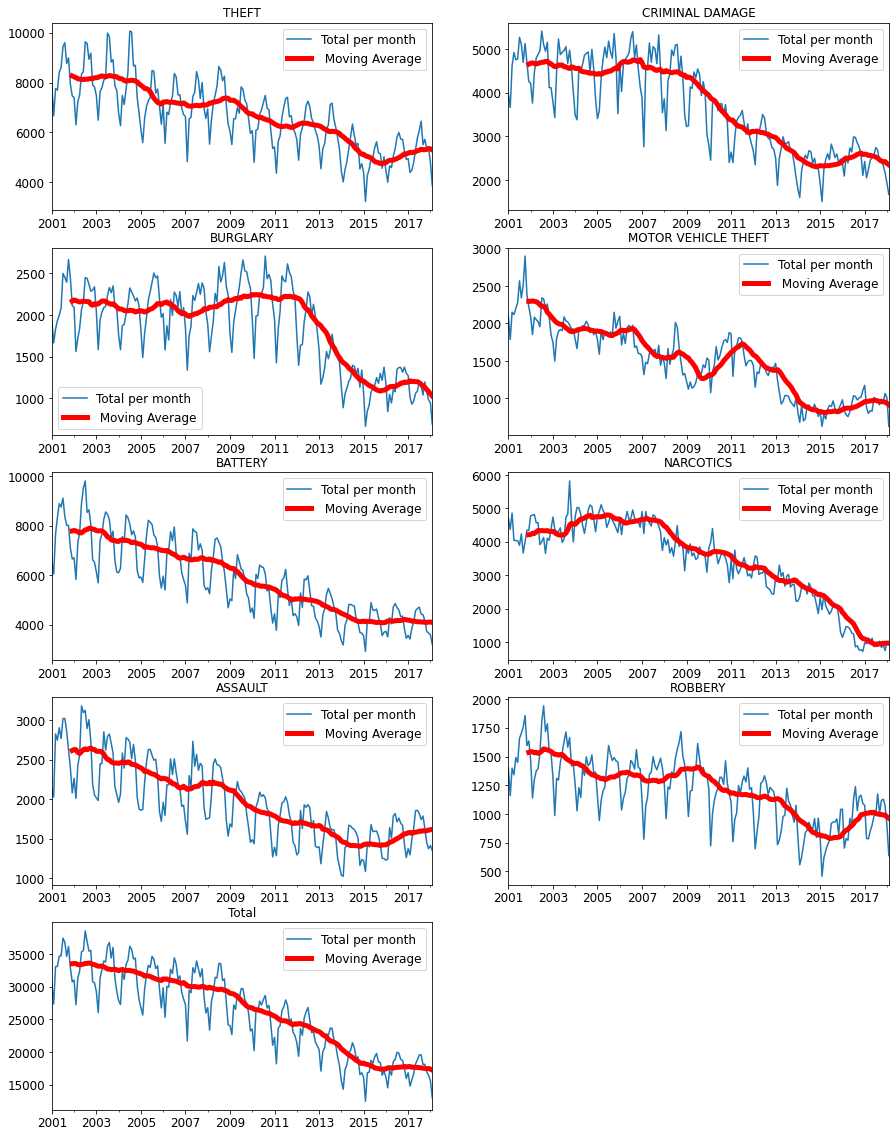

In [20]:
# Initiate the figure and define size
plt.figure(1)
plt.figure(figsize=(15,20))

# Using a for loop to plot each type of crime with a 12 months-moving average
i = 521
for eachCrime in crimeTypes:    
    plt.subplot(i);
    monthly[eachCrime].plot(label='Total per month')
    monthly[eachCrime].rolling(window=12).mean().plot(color='red', linewidth=5, label=' Moving Average')
    plt.title(eachCrime, fontsize=12)
    plt.xlabel('')
    plt.legend(prop={'size':12})
    plt.tick_params(labelsize=12)
    i = i + 1

<Figure size 432x288 with 0 Axes>

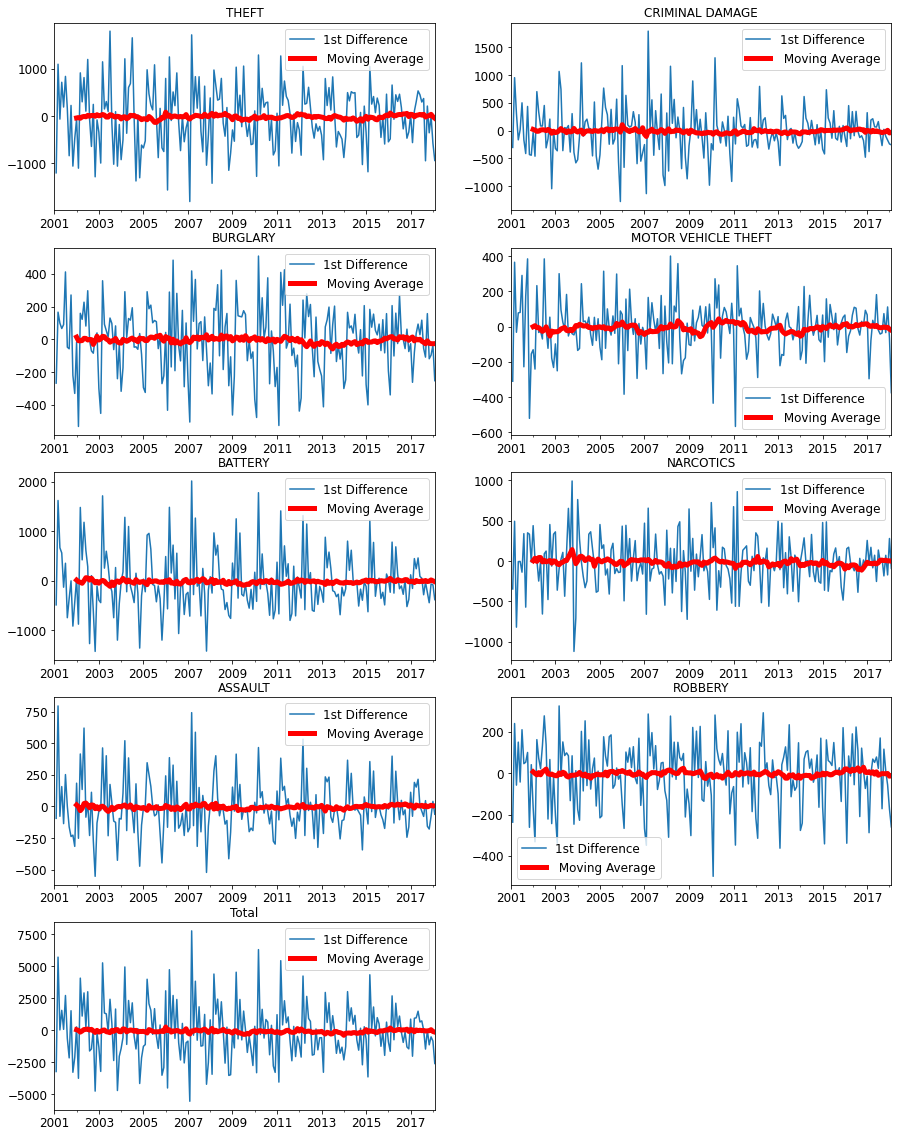

In [21]:
plt.figure(1)
plt.figure(figsize=(15,20))

# Using a for loop to plot each type of crime with a moving average
i = 521
for eachCrime in crimeTypes:    
    plt.subplot(i);
    monthly[eachCrime].diff().plot(label='1st Difference')
    monthly[eachCrime].rolling(window=12).mean().diff().plot(color='red', linewidth=5, label=' Moving Average')
    plt.title(eachCrime, fontsize=12)
    plt.xlabel('')
    plt.legend(prop={'size':12})
    plt.tick_params(labelsize=12)
    i = i + 1

In [22]:
# Create a data frame with the 1st difference
montlhy_1stDiff = monthly.diff().dropna()

# Create a data frame with the results of the ADF test for each type
adfullerResults = pd.DataFrame(columns=crimeTypes, index = ['ADF','Critical Value 1%','Critical Value 5%','p-value'])
for eachType in crimeTypes:
    adf = adfuller(montlhy_1stDiff[eachType])
    adfullerResults[eachType] = ("{:.4f}".format(adf[0]),                                 
                                 "{:.4f}".format(adf[4]['1%']),
                                 "{:.4f}".format(adf[4]['5%']),
                                 "{:.4f}".format(adf[1]),)                                
adfullerResults

,THEFT,CRIMINAL DAMAGE,BURGLARY,MOTOR VEHICLE THEFT,BATTERY,NARCOTICS,ASSAULT,ROBBERY,Total
ADF,-5.6349,-2.7145,-2.2555,-4.0638,-4.0300,-4.8512,-3.1598,-2.7996,-3.5612
Critical Value 1%,-3.4647,-3.4654,-3.4652,-3.4647,-3.4652,-3.4647,-3.4652,-3.4654,-3.4652
Critical Value 5%,-2.8766,-2.8770,-2.8769,-2.8766,-2.8769,-2.8766,-2.8769,-2.8770,-2.8769
p-value,0.0000,0.0716,0.1867,0.0011,0.0013,0.0000,0.0224,0.0583,0.0065


Total


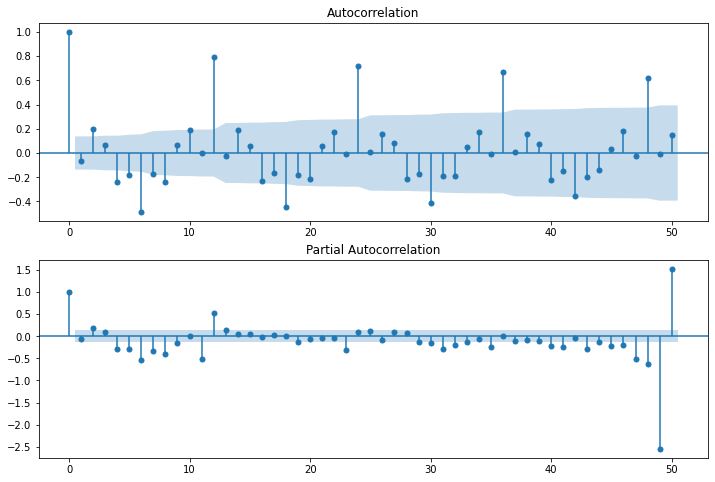

In [23]:
# the autocorrelation and partial autocorrelation graph

print(montlhy_1stDiff[crimeTypes[8]].name)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(montlhy_1stDiff[crimeTypes[0]], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(montlhy_1stDiff[crimeTypes[0]], lags=50, ax=ax2)

In [24]:
# create list of combinations of p,d,q
# Define the p, d and q parameters, set the value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p,d,q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
def myArima(crimeTypeSeries):
    
    print ('Training for:', crimeTypeSeries.name)
    
    # 1 - Find the best parameters for P, D, Q
    lowestAIC = 999999999
    bestOrder = 0
    bestSeasonal_order = 0
    i = 0 # progress indicator
    
    for param in pdq:    
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(crimeTypeSeries,
                                                order=param,
                                                seasonal_order=param_seasonal)
                results = mod.fit()                
                
                # Keep the parameters that gives the lowest AIC
                newAIC = results.aic                
                if newAIC < lowestAIC: 
                    lowestAIC = newAIC
                    bestOrder = param
                    bestSeasonal_order = param_seasonal
                i = i+1
                print('\r', 'Calculating: {:.0f}%'.format(i/64*100), end='')
                
            except:
                i = i+1
                print('\r', 'Calculating: {:.0f}%'.format(i/64*100), end='')
                continue
      
    # 2 - Train the model with the best parameters
    print('\nBest parameters: SARIMA{}x{}12'.format(param, param_seasonal))
    mod = sm.tsa.statespace.SARIMAX(crimeTypeSeries, 
                                    order=bestOrder, 
                                    seasonal_order=bestSeasonal_order)
    results = mod.fit()

    # Plot diagnostics
    results.plot_diagnostics(figsize=(15, 12))    
    plt.show()
    
    # Plot Forecast
    pred = results.get_prediction(start = 145, end = 181, dynamic=False)
    pred_ci = pred.conf_int()
    pred_ci.head()
    plt.figure(figsize=(15,6))
    ax = crimeTypeSeries.plot(label='observed')
    plt.title("Actual and Forecast", fontsize=12)
    pred.predicted_mean.plot(ax=ax, label=' forecast', color='red', alpha=.7, lw=4)
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='r', alpha=.3)    
    ax.set_xlabel('Years')
    ax.set_ylabel('Number of crime')   
    plt.legend()
    plt.show()
    return results

Training for: THEFT
 Calculating: 100%
Best parameters: SARIMA(1, 1, 1)x(1, 1, 1, 12)12


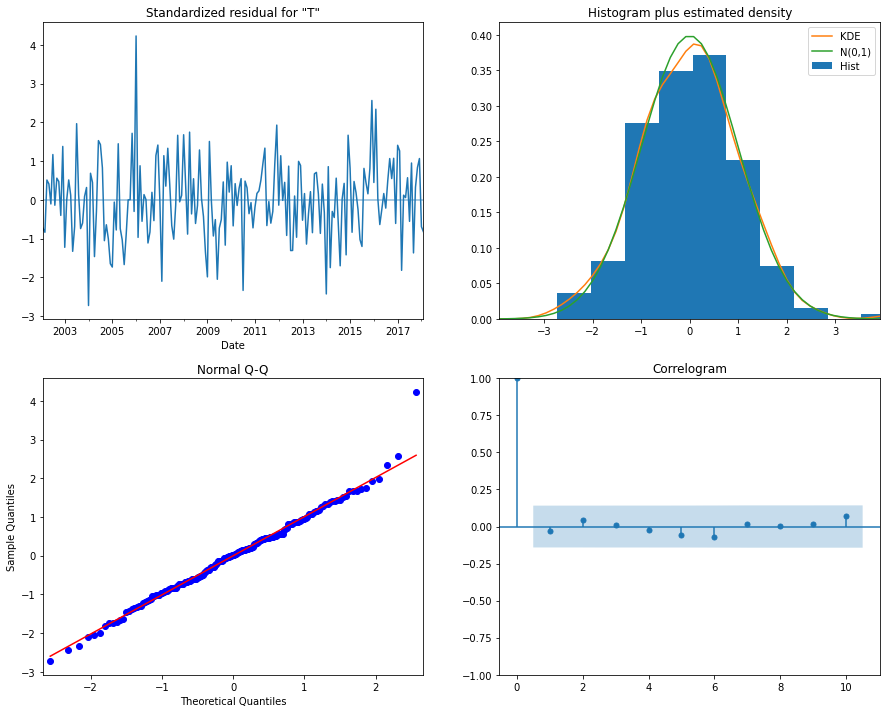

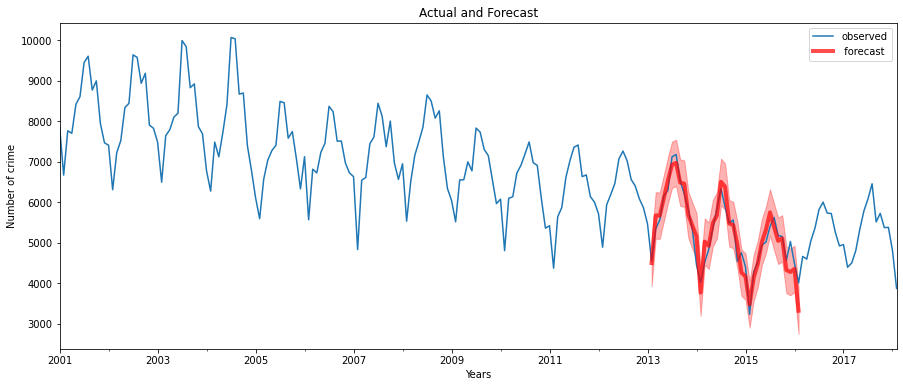

Training for: CRIMINAL DAMAGE
 Calculating: 100%
Best parameters: SARIMA(1, 1, 1)x(1, 1, 1, 12)12


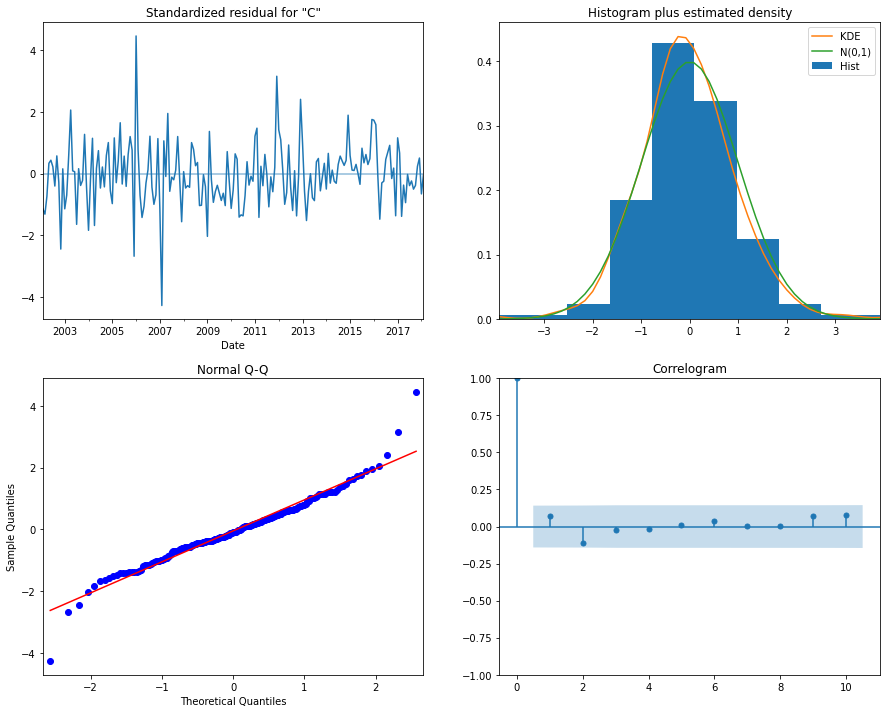

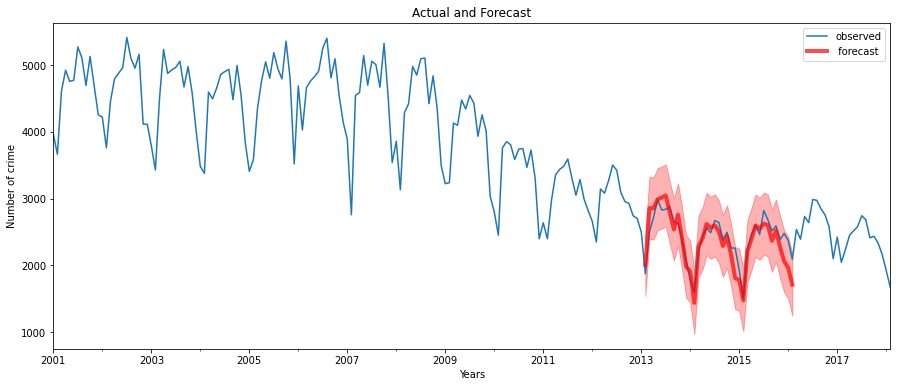

Training for: BURGLARY
 Calculating: 100%
Best parameters: SARIMA(1, 1, 1)x(1, 1, 1, 12)12


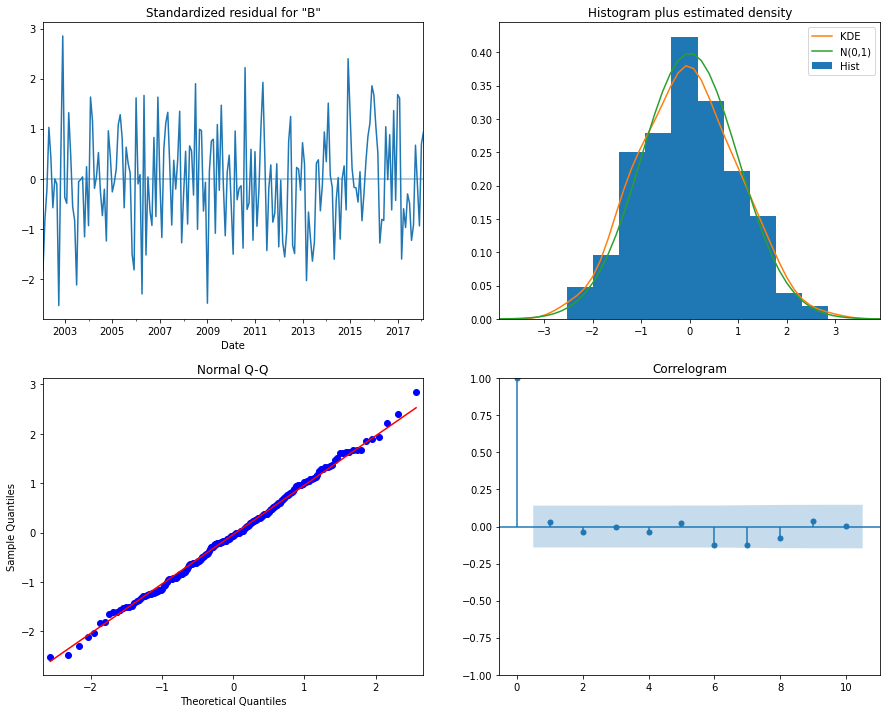

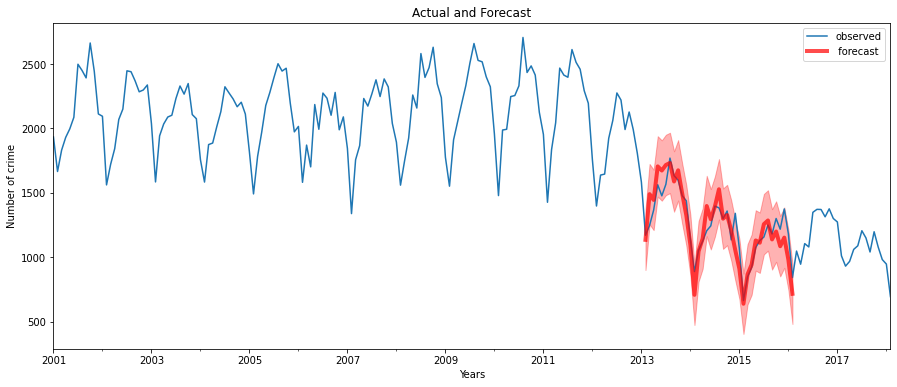

Training for: MOTOR VEHICLE THEFT
 Calculating: 100%
Best parameters: SARIMA(1, 1, 1)x(1, 1, 1, 12)12


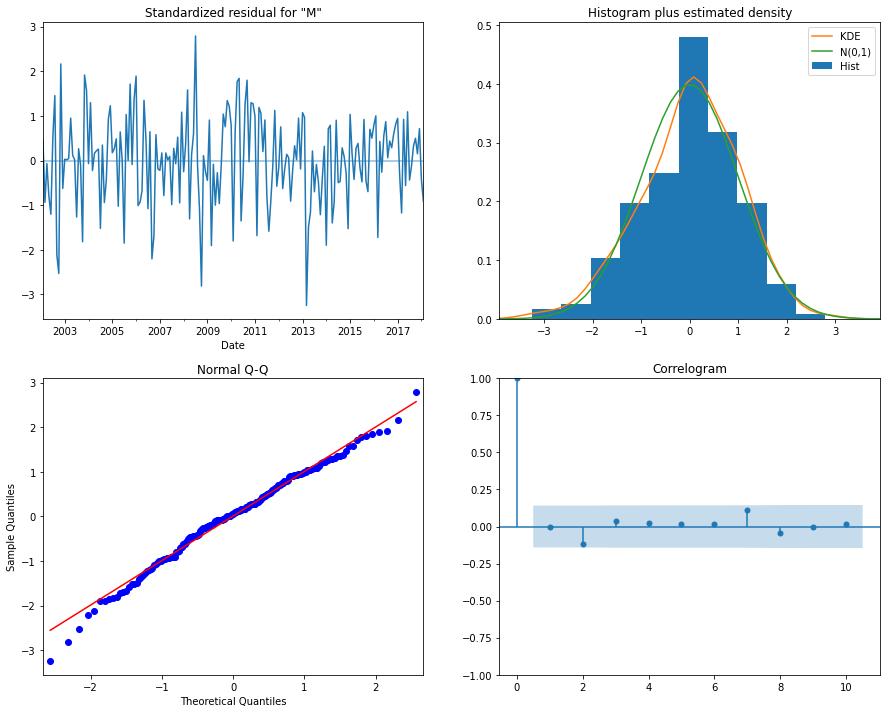

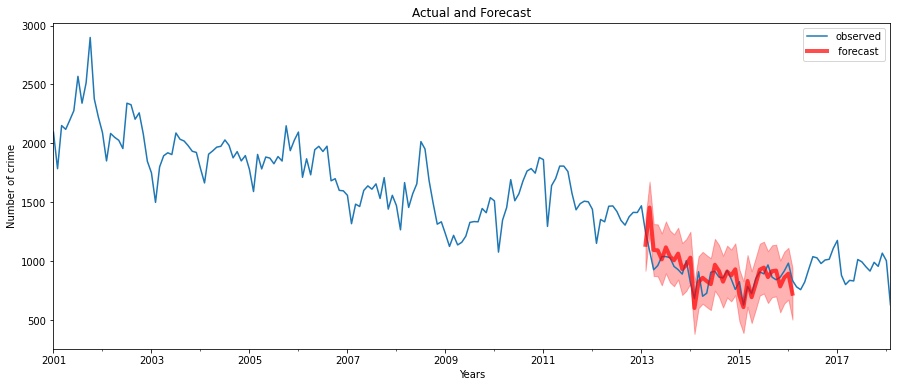

Training for: BATTERY
 Calculating: 100%
Best parameters: SARIMA(1, 1, 1)x(1, 1, 1, 12)12


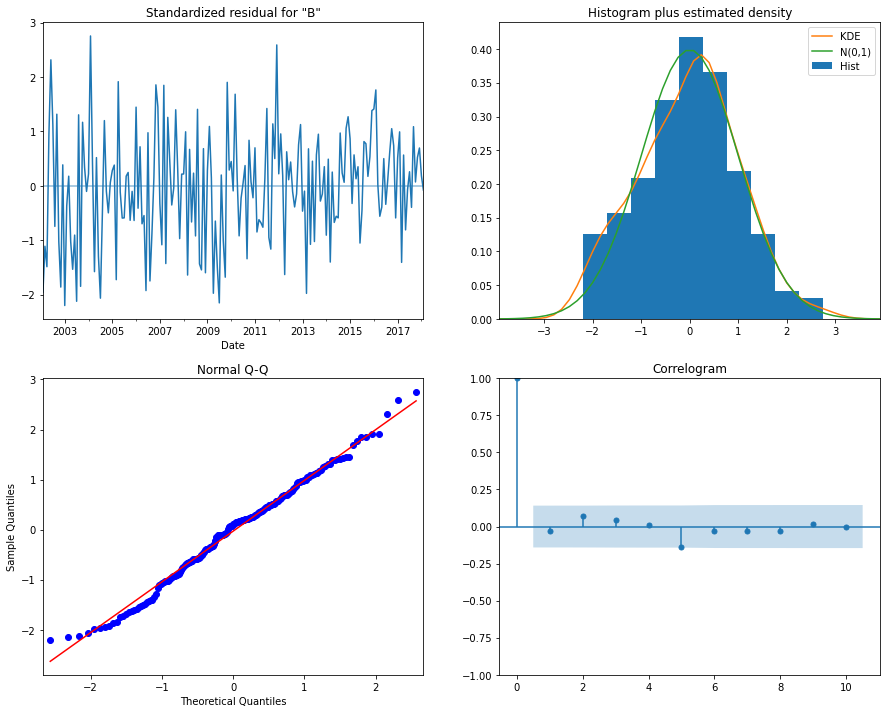

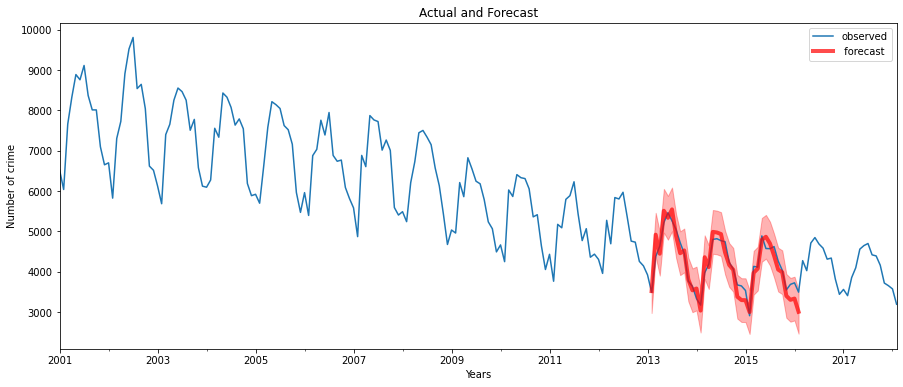

Training for: NARCOTICS
 Calculating: 100%
Best parameters: SARIMA(1, 1, 1)x(1, 1, 1, 12)12


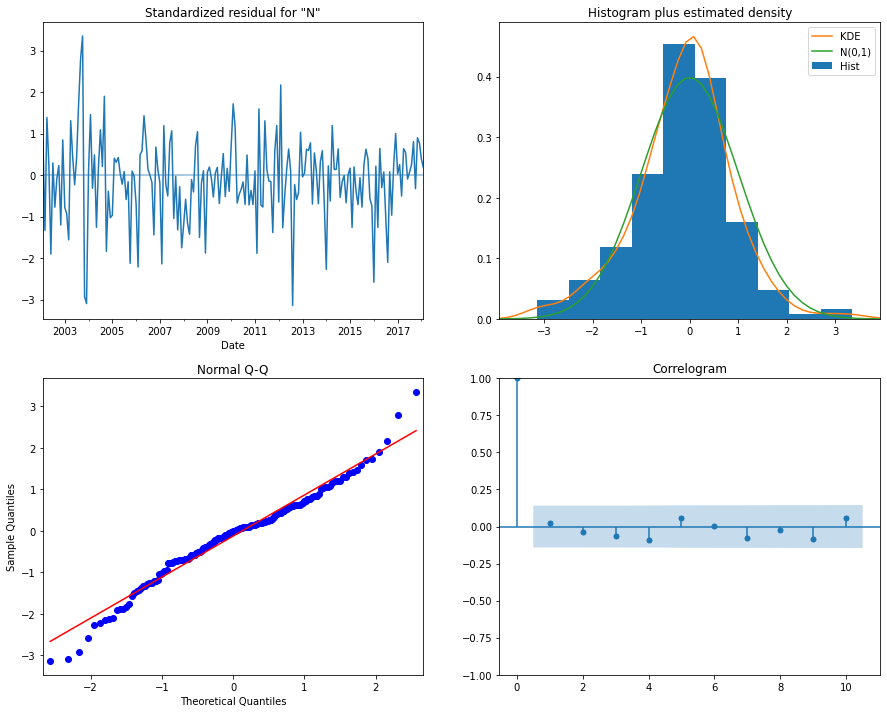

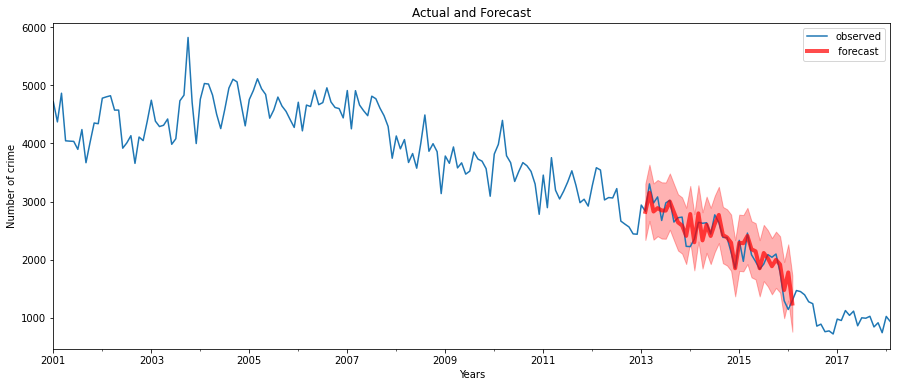

Training for: ASSAULT
 Calculating: 100%
Best parameters: SARIMA(1, 1, 1)x(1, 1, 1, 12)12


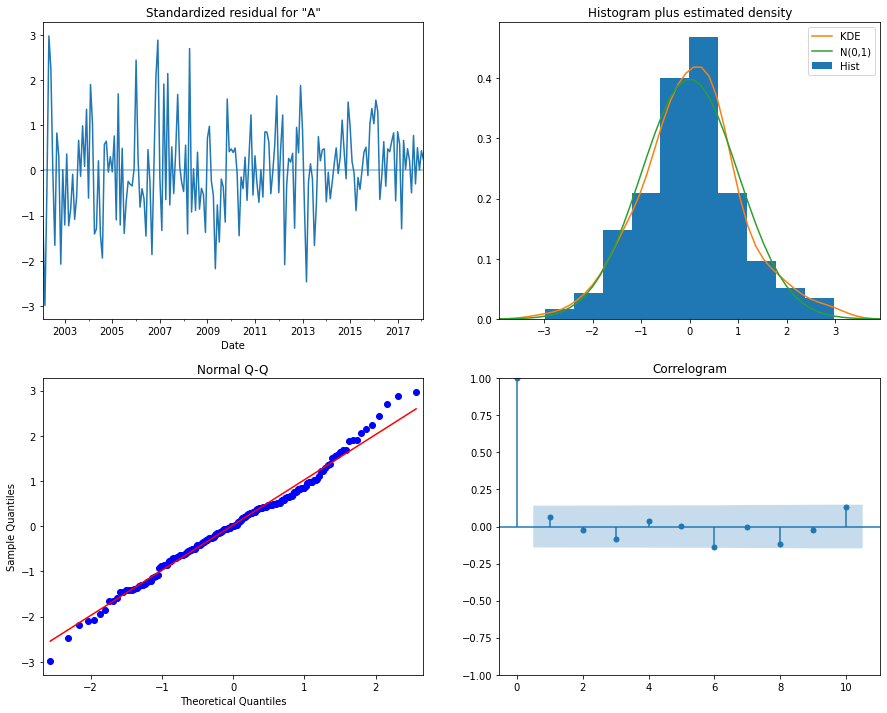

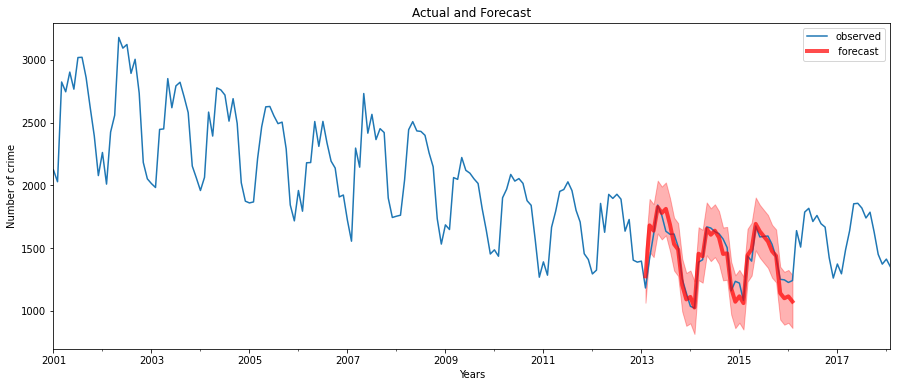

Training for: ROBBERY
 Calculating: 100%
Best parameters: SARIMA(1, 1, 1)x(1, 1, 1, 12)12


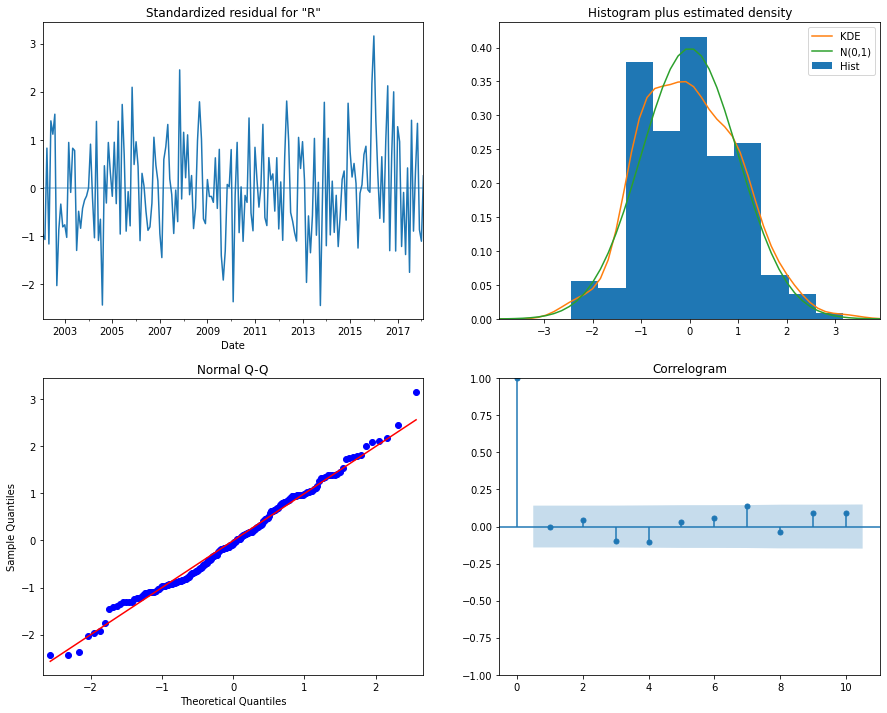

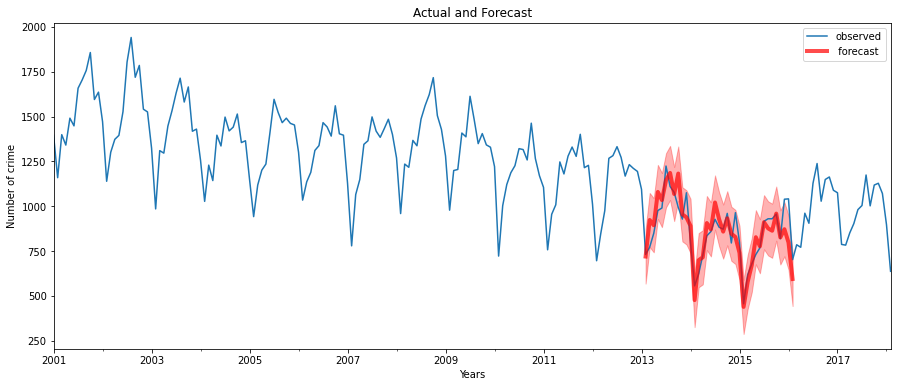

Training for: Total
 Calculating: 100%
Best parameters: SARIMA(1, 1, 1)x(1, 1, 1, 12)12


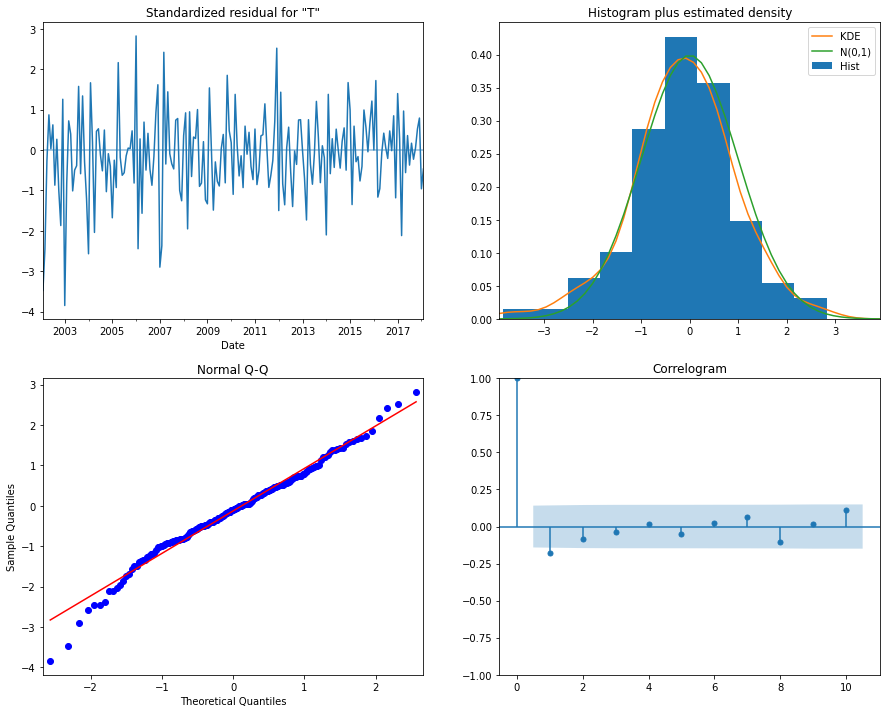

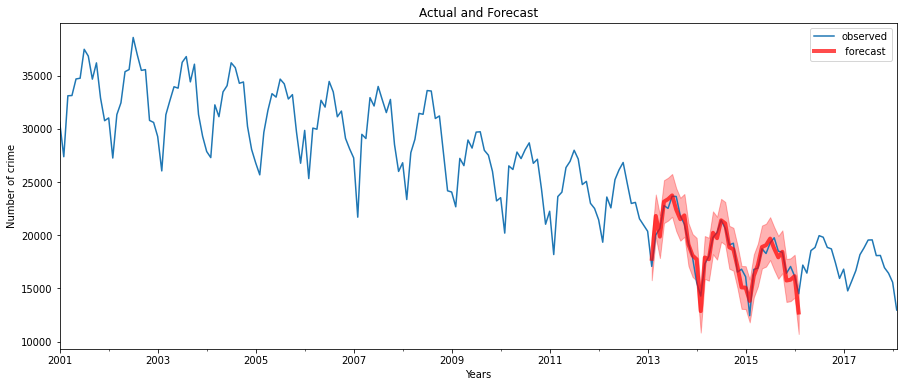

In [26]:
results = []
for i in crimeTypes:    
    results.append(myArima(monthly[i]))

In [34]:
predictions = []
for i in range(0,len(results)):
    predictions.append(results[i].get_prediction(start = 168, end = 189, dynamic=False).predicted_mean)

In [35]:
predictions = pd.DataFrame(predictions)
predictions = predictions.transpose()
predictions.columns = monthly.columns
errors = ((monthly - predictions)/monthly)
errors.dropna(how='all', inplace=True)
n = len(errors)

# Calculate the MAPE
MAPE = round((errors.abs().sum() / n)*100,2)
print ('The Mean Absolute Percentage Error for each type for the year 01/2015 to 10/2016')
print (MAPE)

The Mean Absolute Percentage Error for each type for the year 01/2015 to 10/2016
THEFT                   4.45
CRIMINAL DAMAGE         5.93
BURGLARY                7.93
MOTOR VEHICLE THEFT     7.44
BATTERY                 4.45
NARCOTICS              13.37
ASSAULT                 4.61
ROBBERY                 7.13
Total                   3.73
dtype: float64


In [36]:
predictions_ci = []
for i in range(0,len(results)):
    predictions_ci.append(results[i].get_prediction(start = 168, end = 189, dynamic=False).conf_int())

In [37]:
predictions_ci

[            lower THEFT  upper THEFT
 Date                                
 2015-01-31  3588.914125  4736.800445
 2015-02-28  2898.847970  4046.682043
 2015-03-31  3559.711883  4707.539532
 2015-04-30  3898.126590  5045.950737
 2015-05-31  4439.670160  5587.492401
 2015-06-30  4740.237127  5888.058334
 2015-07-31  5174.045094  6321.865743
 2015-08-31  4813.739350  5961.559710
 2015-09-30  4470.294473  5618.114702
 2015-10-31  4532.056330  5679.876524
 2015-11-30  3750.461622  4898.281675
 2015-12-31  3701.302766  4849.120678
 2016-01-31  3778.380100  4926.182206
 2016-02-29  2743.388418  3891.159086
 2016-03-31  4075.120720  5222.887523
 2016-04-30  4205.394441  5353.159136
 2016-05-31  4543.535591  5691.299139
 2016-06-30  4732.875813  5880.638739
 2016-07-31  5306.096935  6453.859526
 2016-08-31  5285.136820  6432.899237
 2016-09-30  4846.595684  5994.358023
 2016-10-31  4984.739247  6132.501564,
             lower CRIMINAL DAMAGE  upper CRIMINAL DAMAGE
 Date                        